## **Project : Sentiment Analysis of IMDb Movie Reviews Using LSTM**

## **Creator Name : Ayesha Sadiqa Khan**

## **Importing Necessory Libraries**

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

In [13]:
num_words = 10000    # Top 10,000 most frequent words
maxlen = 250         # Max sequence length for each review

## **Loading and Preprocessing the Data**

In [14]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [15]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=64, input_length=maxlen))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


## **Model Summary**

In [16]:

model.build(input_shape=(None, maxlen))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 250, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,089 (2.57 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

## **Model Training**

In [17]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 102s 254ms/step - accuracy: 0.7008 - loss: 0.5615 - val_accuracy: 0.8336 - val_loss: 0.3854
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 159s 299ms/step - accuracy: 0.8978 - loss: 0.2605 - val_accuracy: 0.8564 - val_loss: 0.3396
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 298ms/step - accuracy: 0.9260 - loss: 0.2013 - val_accuracy: 0.8732 - val_loss: 0.3119
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 145s 306ms/step - accuracy: 0.9501 - loss: 0.1456 - val_accuracy: 0.8668 - val_loss: 0.3780
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 138s 297ms/step - accuracy: 0.9576 - loss: 0.1209 - val_accuracy: 0.8598 - val_loss: 0.3945
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 116s 297ms/step - accuracy: 0.9600 - loss: 0.1130 - val_accuracy: 0.8632 - val_loss: 0.4201
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 297ms/step - accuracy: 0.9764 - loss: 0.0727 - val_accuracy: 0.8576 - val_loss: 0.4940
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 293ms/step - accuracy: 0.9808 -

## **Model Testing**

In [20]:
# 1. From here it get the word index dictionary
word_index = imdb.get_word_index()

# 2. This is a Function to encode a custom review text
def encode_review(text):

    # Preprocessing: lowercase and split words
    words = text.lower().split()
    encoded = []
    for word in words:
        if word in word_index and word_index[word] < num_words:
            encoded.append(word_index[word] + 3)  # +3 because 0,1,2 are reserved
        else:
            encoded.append(2)  # Unknown words get the index 2
    return pad_sequences([encoded], maxlen=maxlen)

# 3. Function that predicts the sentiment
def predict_sentiment(text):
    encoded = encode_review(text)
    prediction = model.predict(encoded)  # Here it Predict sentiment
    print(f"Prediction score: {prediction[0][0]:.4f}")
    if prediction[0][0] > 0.5:
        print("Sentiment: Positive 😊")
    else:
        print("Sentiment: Negative 😞")


In [22]:
predict_sentiment("I hated this movie, it was so boring and slow.")
predict_sentiment("One of the best films I have ever seen!")
predict_sentiment("The movie was terrible and disappointing.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction score: 0.0241
Sentiment: Negative 😞
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction score: 0.9657
Sentiment: Positive 😊
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction score: 0.0125
Sentiment: Negative 😞


## **Visualizations**

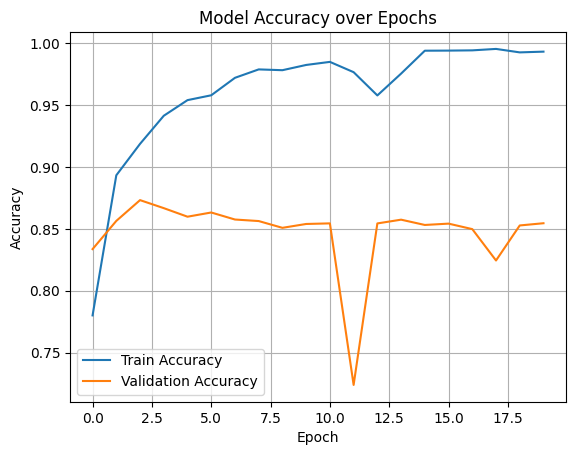

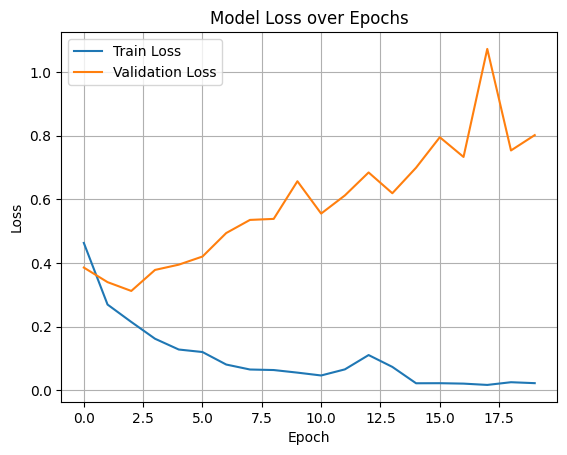

In [23]:
import matplotlib.pyplot as plt

# Ploting Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Plotting Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
pip install seaborn


782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step


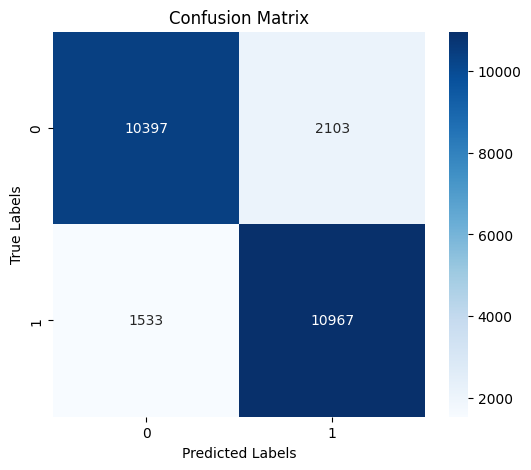

In [25]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predicting on X_test
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")  # Converting probabilities to 0 or 1

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## **Accuary (Classification Report)**

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))


              precision    recall  f1-score   support

    Negative       0.87      0.83      0.85     12500
    Positive       0.84      0.88      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000



782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step


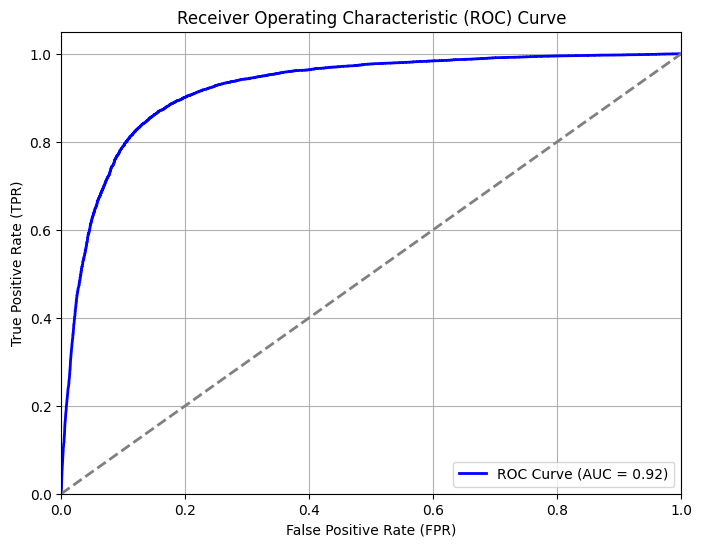

In [27]:
from sklearn.metrics import roc_curve, auc

# Predicting probabilities on test set
y_pred_probs = model.predict(X_test).ravel()  # Flattening to 1D array

# Computing False Positive Rate and True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

roc_auc = auc(fpr, tpr)

# ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


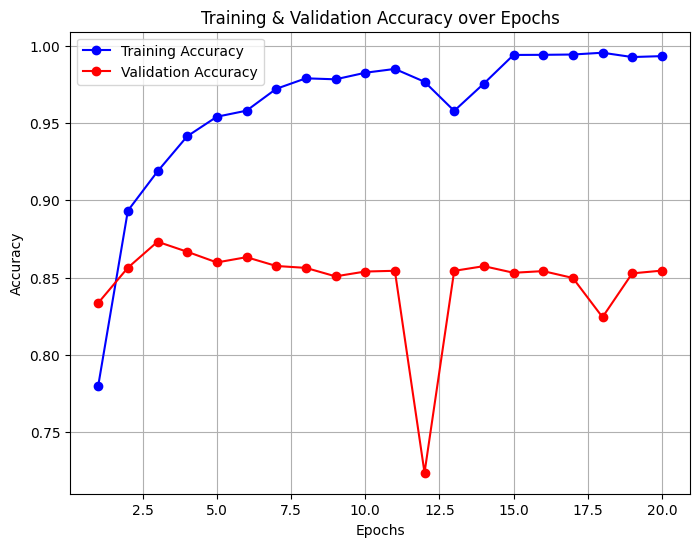

In [28]:
epochs_range = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(8,6))
plt.plot(epochs_range, history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step


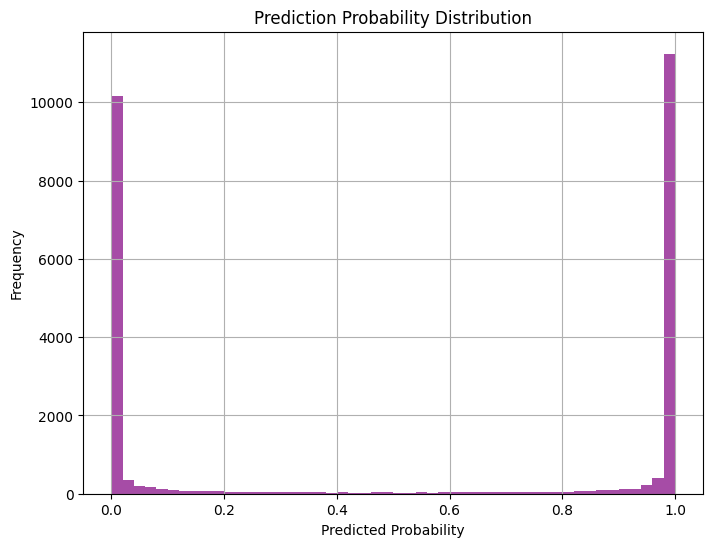

In [29]:
# Predicting on test data
y_pred_probs = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.hist(y_pred_probs, bins=50, color='purple', alpha=0.7)
plt.title('Prediction Probability Distribution')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step


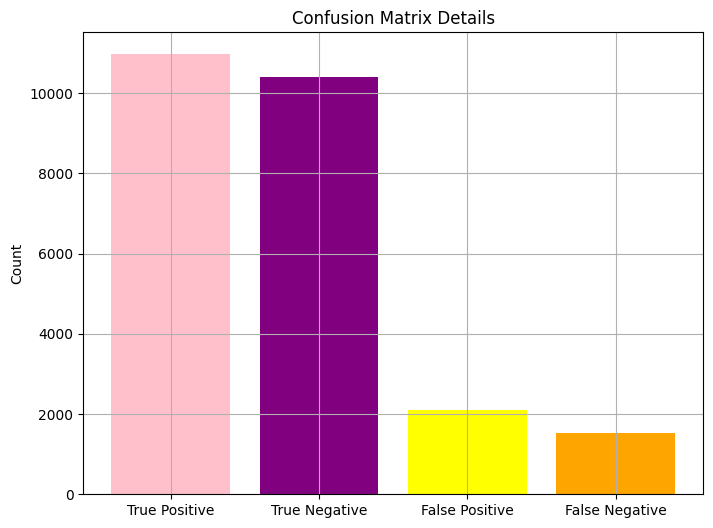

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, (model.predict(X_test) > 0.5).astype("int32"))
tp = cm[1, 1]
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]

plt.figure(figsize=(8,6))
labels = ['True Positive', 'True Negative', 'False Positive', 'False Negative']
counts = [tp, tn, fp, fn]
plt.bar(labels, counts, color=['pink', 'purple', 'yellow', 'orange'])
plt.title('Confusion Matrix Details')
plt.ylabel('Count')
plt.grid(True)
plt.show()


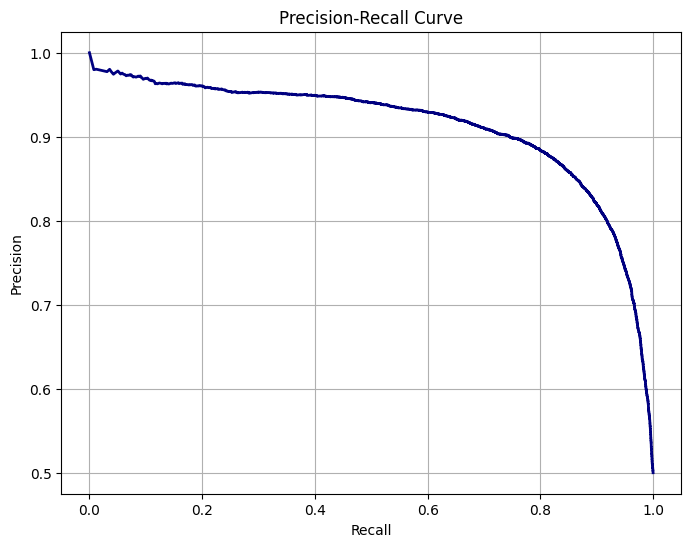

In [31]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='navy', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


## **Final Results (Summary)**

In [34]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

y_pred_probs = model.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype("int32")

final_accuracy = accuracy_score(y_test, y_pred_classes)
print(f"\n Final Test Accuracy: {final_accuracy:.4f}")


print("\n Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=["Negative", "Positive"]))

print("\n Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"\n ROC-AUC Score: {roc_auc:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step

 Final Test Accuracy: 0.8546

 Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.83      0.85     12500
    Positive       0.84      0.88      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.86      0.85      0.85     25000
weighted avg       0.86      0.85      0.85     25000


 Confusion Matrix:
[[10397  2103]
 [ 1533 10967]]

 ROC-AUC Score: 0.9220
